<a href="https://colab.research.google.com/github/kebtes/iCog-Task/blob/main/NGrams_Task_iCog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import re
from typing import List, Tuple, Dict
from collections import defaultdict, Counter

In [43]:
"""
The Amharic corpus used for this task is from this repo
https://github.com/MarsPanther/Amharic-English-Machine-Translation-Corpus
"""

corpus_files = [
    "/content/amharic_corpus_legal.txt",
    "/content/amharic_corpus_news.txt",
    "/content/amharic_corpus_history.txt"
]

In [44]:
corpus = []

for corpus_file in corpus_files:
    with open(corpus_file, "r", encoding="utf-8") as f:
        corpus.extend(f.readlines())

corpus = "".join(corpus)

In [45]:
corpus = corpus.replace("\n", " ")

tokens = corpus.split(" ")
tokens = [tk for tk in tokens if tk.strip()]

courpus = None # Deallocate to free up RAM

token_size = len(tokens)
print(f"Tokens: {token_size}")


Tokens: 338570


In [46]:
def generate_ngrams(tokens: List[str], n: int) -> List[Tuple[str]]:
    ngrams = []

    for i in range(token_size - n + 1):
        ngram = tuple(tokens[i: i + n])
        ngrams.append(ngram)

    return ngrams

def calc_ngram_freq(ngrams: List[Tuple[str]]) -> Counter:
    return Counter(ngrams)

def calc_ngram_prob(ngram_freq: Counter) -> Dict[Tuple[str], int]:
    ngram_prob = {}
    ngram_size = sum(ngram_freq.values())

    for ngram, freq in ngram_freq.items():
        ngram_prob[ngram] = freq / ngram_size

    return ngram_prob

**1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints.**

In [47]:
# Sample ngram outputs

print(f"Unigram: {generate_ngrams(tokens[:1000], 1)}")

print(f"Bigram: {generate_ngrams(tokens[:1000], 2)}")

print(f"Trigram: {generate_ngrams(tokens[:1000], 3)}")

print(f"4-gram: {generate_ngrams(tokens[:1000], 4)}")

Unigram: [('የኢትዮጵያ',), ('ፌደራላዊ',), ('ዲሞክራሲያዊ',), ('ሪፐብሊክ',), ('ፌደራል',), ('ነጋሪት',), ('ጋዜጣ',), ('ሃያ',), ('ሁለተኛ',), ('ዓመት',), ('ቁጥር',), ('፩፻፩',), ('አዲስ',), ('አበባ',), ('ሐምሌ',), ('፳፱',), ('ቀን',), ('፪ሺ፰ዓ.ም',), ('ዋጅ',), ('ቁጥር',), ('፱፻፹/፪ሺ፰',), ('ዓ.ም',), ('ንግድ',), ('ምዝገባና',), ('ፍቃድ',), ('አዋጅ………..ገጽ',), ('፱ሺ፩፻፺፬',), ('ዋጅ',), ('ቁጥር',), ('፱፻፹/፪ሺ፰',), ('ዓ.ም',), ('የንግድ',), ('ምዝገባና',), ('ፈቃድ',), ('አዋጅ',), ('ንግድ',), ('ምዝገባ',), ('እና',), ('የንግድ',), ('ሥራ',), ('ፈቃድ',), ('አገልግሎት',), ('አሰጣጥ',), ('ሥርዓትን',), ('ፍትሀዊ፣',), ('ዘመናዊ፣',), ('ቀልጣፋ',), ('እና',), ('ተደራሽ',), ('በማድረግ',), ('የንግዱን',), ('ማህበረሰብ',), ('እና',), ('ህብረተሰቡ',), ('ከንግዱ',), ('ሥርዓት',), ('የሚጠብቀውን',), ('አገልግሎት',), ('እንዲያገኝ',), ('የሕግና',), ('የአሠራር',), ('ክፍተቶችን',), ('በመድፈንና',), ('እርካታን',), ('በማሳደግ',), ('በአገሪቱ',), ('ሁለንተናዊ',), ('ኢኮኖሚ',), ('ውስጥ',), ('የበኩሉን',), ('ሚና',), ('እንዲጫወት',), ('ማድረግ',), ('በማስፈለጉ፤',), ('ንግድ',), ('ምዝገባ',), ('እና',), ('የንግድ',), ('ፈቃድ',), ('አሰጣጥን',), ('በዘመናዊ',), ('ቴክኖሎጂ',), ('እንዲደገፍ',), ('በማድረግ',), ('የንግድ',), ('ሥርዓቱ',), ('ለመረጃ',), ('አያያዝ',),

**1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.**

In [48]:
# Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.

top_10_unigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(tokens, 1))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_bigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(tokens, 2))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_trigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(tokens, 3))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_4gram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(tokens, 4))).items(), key=lambda x: x[1], reverse=True)[:10])

print(f"Top 10 unigrams: {top_10_unigram}")
print(f"Top 10 unigrams: {top_10_bigram}")
print(f"Top 10 unigrams: {top_10_trigram}")
print(f"Top 10 unigrams: {top_10_4gram}")


Top 10 unigrams: {('ላይ',): 0.009965442892164103, ('ውስጥ',): 0.007197920666331925, ('ወይም',): 0.005496647665180022, ('ጋር',): 0.004374280060253419, ('እና',): 0.004359512065451753, ('ወደ',): 0.003969637002687775, ('ነው።',): 0.003922379419322444, ('ቤት',): 0.003810142658829784, ('ጊዜ',): 0.003609297929527129, ('ግን',): 0.0032282836636441502}
Top 10 unigrams: {('ምክር', 'ቤት'): 0.0014265925114230777, ('በዚህ', 'አዋጅ'): 0.001054437943225753, ('ንዑስ', 'አንቀጽ'): 0.0006911441980807457, ('ነገር', 'ግን'): 0.0006793297673443227, ('ፍርድ', 'ቤት'): 0.0005168813447185064, ('አንቀጽ', 'ንዑስ'): 0.0004962060909297661, ('ሥራ', 'ላይ'): 0.00046667001408870864, ('በዚህ', 'አንቀጽ'): 0.0004637164064046029, ('ማለት', 'ነው፡፡'): 0.00042531950651122815, ('ቀን', '1990'): 0.0004105514680906994}
Top 10 unigrams: {('አንቀጽ', 'ንዑስ', 'አንቀጽ'): 0.0004903003237163583, ('በዚህ', 'አንቀጽ', 'ንዑስ'): 0.0004135062971101817, ('ፌደራላዊ', 'ዲሞክራሲያዊ', 'ሪፐብሊክ'): 0.00024219654545024928, ('በዚህ', 'አዋጅ', 'መሠረት'): 0.00022742846341059994, ('ከሚመለከተው', 'አካል', 'ጋር'): 0.0001772169844757

**1.3 Calculate the conditional probability of a word given the previous word using bigrams.**

In [49]:
token_freq = calc_ngram_freq(tokens)
bigram_freq = calc_ngram_freq(generate_ngrams(tokens, 2))

bigram_conditional_prob = {}

for bigram, freq in bigram_freq.items():
    bigram_conditional_prob[bigram] = freq / token_freq[bigram[0]]

for bigram, prob in bigram_conditional_prob.items():
    print(f"{bigram}: {prob}")

token_freq = None
bigram_freq = None
bigram_conditional_prob = None

Streaming output truncated to the last 5000 lines.
('ደሴት', 'ጨምሮ'): 0.05555555555555555
('ጨምሮ', 'በእንግሊዝ'): 0.006097560975609756
('ጥበቃ', 'የሚተዳደር'): 0.011494252873563218
('የሚተዳደር', 'ግዛት'): 0.1111111111111111
('ግዛት', 'ነው፡፡'): 0.009708737864077669
('ስፋት', '1020'): 0.022727272727272728
('1020', 'ስኩዌር'): 1.0
('ብዛት', '285.000'): 0.02666666666666667
('285.000', 'ዋና'): 1.0
('ከተማ', 'ዛንዚባር፡፡'): 0.001949317738791423
('ዛንዚባር፡፡', 'ቋንቋ'): 0.5
('ዐረብኛ', 'እንግሊዝኛ'): 0.2
('እንግሊዝኛ', 'ስዋሂለና'): 0.0625
('ስዋሂለና', 'ሂንዱ፡፡'): 1.0
('ሂንዱ፡፡', 'የመንግሥቱ'): 1.0
('አስተዳደር', 'የእንግሊዝ'): 0.00625
('ተቀማጭ', 'የሆነ'): 0.07692307692307693
('የሆነ', 'ሹም'): 0.004016064257028112
('ሹም', 'ግዛቱን'): 0.05263157894736842
('ግዛቱን', 'ቢያስተዳድርም'): 0.5
('ቢያስተዳድርም', 'የዛንዚባር'): 1.0
('የዛንዚባር', 'ሡልጣን'): 0.5
('ሡልጣን', 'ብዙ'): 0.5
('ብዙ', 'የሆነ'): 0.0034965034965034965
('የሆነ', 'መብት'): 0.004016064257028112
('መብት', 'ይዘዋል፡፡'): 0.004694835680751174
('ይዘዋል፡፡', 'ገዥልዑል'): 0.5
('ገዥልዑል', 'ሰይድ'): 1.0
('ሰይድ', 'ሰር'): 0.42857142857142855
('ሰር', 'አብደላ'): 0.09090909090909091

**Stopwords**

In [50]:
"""
Stop words used for this task are from
https://www.irit.fr/AmharicResources/stop-word-list/

"""

with open("amharic_stop_words.txt", mode="r", encoding="utf-8") as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')
stop_words = [sw for sw in stop_words if sw.strip()]

def remove_stop_words(tokens: List[str], stop_words: List[str]) -> List[str]:
    stop_words_set = set(stop_words)

    cleaned_text = [tk for tk in tokens if tk not in stop_words_set]

    print(cleaned_text)
    return cleaned_text

print(stop_words)

['ይኖረዋል', 'እላችኋለሁ', 'አጠናቀዋል', 'አልቀረበም', 'ሆይ', 'አልታየም', 'አስገብተዋል', 'አትቷል', 'ይከፍታል', 'የለም', 'ይሠራል', 'ይገርመኛል', 'ሆነህ', 'ከኋላ', 'ተነስቷል', 'ማንም', 'ይኖርበታል', 'ያገለግላል', 'ብለውታል', 'ይጠፋዋል', 'ተጠቁሟል', 'አድርጎታል', 'አስታውሰዋል', 'ነች', 'አሁንም', 'ታውቋል', 'አብራርተዋል', 'አስገንዝበዋል', 'ትናገራል', 'ሰሞን', 'ሆናል', 'ቆይተዋል', 'አምኗል', 'በዚያም', 'ያመላክታል', 'ይቀጥላል', 'ነገሮች', 'ናት', 'አክለዋል', 'አይችሉም', 'ተሰጥቷቸዋል', 'ይቋቋማል', 'ሆነም', 'እባክዎ', 'አላደረገም', 'ተቆጥሯል', 'አላቆሙም', 'ይችላል', 'አስተላልፈዋል', 'ተሰጥታል', 'አሳይተዋል', 'ተመልሰዋል', 'አድርጋዋል', 'ሆነው', 'ከመካከል', 'እያንዳንዳችው', 'አካሂደዋል', 'ተደርገዋል', 'ይጠቅሳል', 'ወዘተ', 'አይደለምን', 'ነበራች', 'አመልክተዋል', 'አሳውቋል', 'ተከስተዋል', 'አልተገለጸም', 'አስቀምጦታል', 'ይታወሳል', 'እናንተ', 'ያከናውናል', 'ውስጥ', 'ኖርን', 'በሆላ', 'ተጠቅመዋል', 'አሉ', 'ቢሆን', 'አስተላልፏል', 'አካቷል', 'ቀጥለዋል', 'አሳስበዋል', 'ይሰጣል', 'አንፈልግም', 'ተጠቅሷል', 'ያባብሱታል', 'ይጭራል', 'ተንትኗል', 'ይገኙበታል', 'ተሰምቷል', 'ተነግሯል', 'ተበትኗል', 'እነዚህንም', 'ቢል', 'አስጠንቅቋል', 'ተጠቆም', 'አድርጓቸዋል', 'በሆነ', 'አይደሉም', 'አስታውቋል', 'ይቻላል', 'እነዚያም', 'አንችልም', 'ተይቀዋል', 'ገብታል', 'ተወያይተዋል', 'ባሉ', 'ሰሞኑን', 'በውስጥ', 'ተነግሯቸዋል', 'ቢኖር', 'ያመለከታል', 'ነበር', 'መካከል', 'ብለ

**1.4 Remove common stopwords and recompute bigram and trigram frequencies, find the top 10 n-grams; n=1,2,3,4.**

In [51]:
# Remove common stopwords and recompute bigram and trigram frequencies, find
# the top 10 n-grams; n=1,2,3,4.

cleaned_tokens = remove_stop_words(tokens, stop_words)

top_10_unigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(cleaned_tokens, 1))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_bigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(cleaned_tokens, 2))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_trigram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(cleaned_tokens, 3))).items(), key=lambda x: x[1], reverse=True)[:10])
top_10_4gram = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(cleaned_tokens, 4))).items(), key=lambda x: x[1], reverse=True)[:10])

print(f"Top 10 unigrams: {top_10_unigram}")
print(f"Top 10 unigrams: {top_10_bigram}")
print(f"Top 10 unigrams: {top_10_trigram}")
print(f"Top 10 unigrams: {top_10_4gram}")


Top 10 unigrams: {(): 0.12600348524677318, ('ነው።',): 0.003922379419322444, ('ቤት',): 0.003810142658829784, ('ጊዜ',): 0.003609297929527129, ('ቀን',): 0.0028620373925628377, ('ነበር።',): 0.0026434710694981834, ('ሥራ',): 0.002457394334997194, ('አዋጅ',): 0.0023628791682665327, ('ዓ.ም',): 0.002277224798416871, ('መንግሥት',): 0.0020970552618365477}
Top 10 unigrams: {(): 0.12600090380395135, ('ምክር', 'ቤት'): 0.0014265925114230777, ('ንዑስ', 'አንቀጽ'): 0.0006911441980807457, ('ፍርድ', 'ቤት'): 0.0005168813447185064, ('አንቀጽ', 'ንዑስ'): 0.0004962060909297661, ('ቀን', '1990'): 0.0004105514680906994, ('ጠቅላይ', 'ሚኒስትር'): 0.00039282982198606486, ('የተባበሩት', 'መንግሥታት'): 0.00033966488367216137, ('አዋጅ', 'ቁጥር'): 0.00033375766830394984, ('ሥራ', 'አስኪያጅ'): 0.00032785045293573837}
Top 10 unigrams: {(): 0.1259983223458803, ('አንቀጽ', 'ንዑስ', 'አንቀጽ'): 0.0004903003237163583, ('ፌደራላዊ', 'ዲሞክራሲያዊ', 'ሪፐብሊክ'): 0.00024219654545024928, ('ብሔራዊ', 'ክልላዊ', 'መንግሥት'): 0.00017721698447579215, ('የጥብቅና', 'ሙያ', 'አገልግሎት'): 0.00016835613525200256, ('ኢትዮጵያ', '

**Find the most common amharic stopwords**

In [52]:
def calc_stopword_freq(tokens: List[str], stop_words: List[str]) -> Dict[str, int]:
    stop_words_set = set(stop_words)
    stop_word_freq = defaultdict(int)

    for tk in tokens:
        if tk in stop_words_set:
            stop_word_freq[tk] += 1

    return stop_word_freq

common_stopwords = dict(sorted(calc_ngram_prob(calc_stopword_freq(tokens, stop_words)).items(), key=lambda x: x[1], reverse=True)[:1])
print("The most common stopword on this corpus is")
print(f"{common_stopwords}")



The most common stopword on this corpus is
{'ላይ': 0.07908862895853355}


**Create word clouds for unigrams, bigrams, and trigrams before and after stop word removal.**

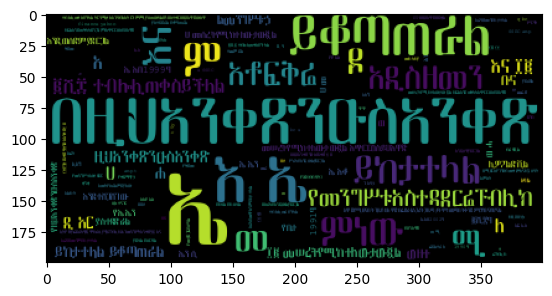

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

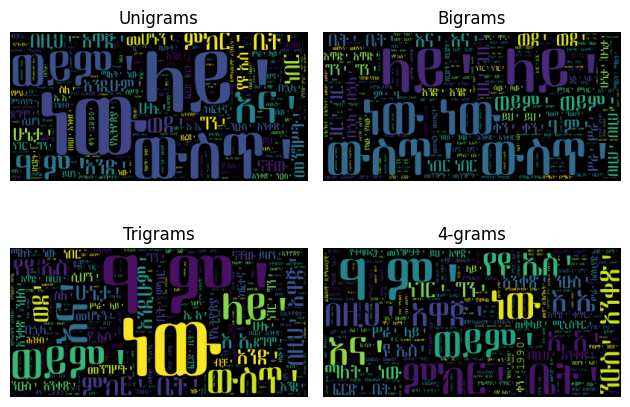

In [149]:
# Before stopword removal

wc1 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(tokens, 1))))
wc2 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(tokens, 2))))
wc3 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(tokens, 3))))
wc4 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(tokens, 4))))

plt.subplot(2, 2, 1)
plt.imshow(wc1)
plt.title('Unigrams')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wc2)
plt.title('Bigrams')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wc3)
plt.title('Trigrams')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wc4)
plt.title('4-grams')
plt.axis('off')

plt.tight_layout()
plt.show()

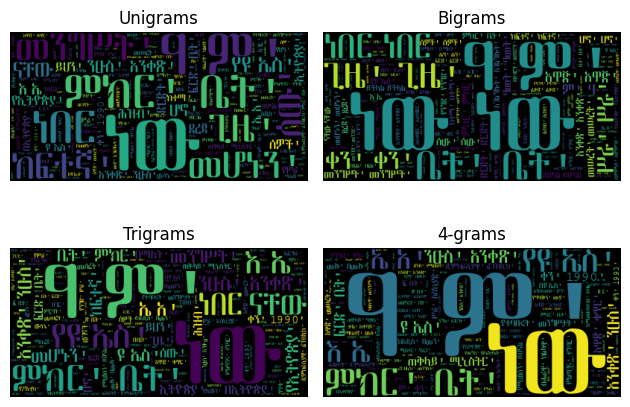

In [151]:
# after stopword removal

wc1 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(remove_stop_words(tokens, stop_words), 1))))
wc2 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(remove_stop_words(tokens, stop_words), 2))))
wc3 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(remove_stop_words(tokens, stop_words), 3))))
wc4 = WordCloud(font_path="/content/zelan.ttf").generate("".join(str(generate_ngrams(remove_stop_words(tokens, stop_words), 4))))

plt.subplot(2, 2, 1)
plt.imshow(wc1)
plt.title('Unigrams')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wc2)
plt.title('Bigrams')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wc3)
plt.title('Trigrams')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wc4)
plt.title('4-grams')
plt.axis('off')

plt.tight_layout()
plt.show()

In [55]:
import random

def generate_random_sentences(tokens: List[str], sentences: int):
    """
    Generates random sentences utilizing the tokens
    n - size of the words, its is set between 1 - 4 for practical purposes
    """

    n = random.randint(1, 4)

    random_sentences = []

    for _ in range(sentences):
        sentence = []

        for _ in range(n):
            sentence.append(random.choice(tokens))

        random_sentences.append(" ".join(sentence))

    return random_sentences

1.6 What is the probability of the sentence. "ኢትዮጵያ ታሪካዊ ሀገር ናት ". You can also try
more sentences.

In [153]:
sentences_to_check = ["ኢትዮጵያ ታሪካዊ ሀገር ናት", "ኢትዮጵያ ፌደራላዊ ዲሞክራሲያዊ ሪፐብሊክ"]

sentences_to_check.extend(generate_random_sentences(tokens, 2))
sentences_prob = {}

for sentence in sentences_to_check:
    # we calculate the word size (n) and use it to create ngram model based on its this
    n = len(sentence.split())

    ngram_prob = dict(sorted(calc_ngram_prob(calc_ngram_freq(generate_ngrams(tokens, n))).items(), key=lambda x: x[1], reverse=True)[:10])

    sentence_tuple = tuple(sentence.split())
    sentences_prob[sentence_tuple] = ngram_prob.get(sentence_tuple, 0)

for sentence, prob in sentences_prob.items():
    print(f"{sentence}: {prob}")

('ኢትዮጵያ', 'ታሪካዊ', 'ሀገር', 'ናት'): 0
('ኢትዮጵያ', 'ፌደራላዊ', 'ዲሞክራሲያዊ', 'ሪፐብሊክ'): 0.00015654213198569263
('ሲሆን',): 0
('በማረፊያ',): 0


**Generate random sentences using n-grams; explain what happens as n-increases based on your output.**

In [82]:
def generate_sentences_from_ngrams(tokens: List[str], n: int, num_sentences: int, max_words: int = 10) -> List[str]:
    ngrams = generate_ngrams(tokens, n)
    ngram_freq = calc_ngram_freq(ngrams)

    generated_sentences = []

    for _ in range(num_sentences):
        sentence = []

        # case 1: Unigram model (n = 1)
        # in this case, we just take a sample based on their frequencies
        if n == 1:
            for _ in range(max_words):
                next_word = random.choices(
                    [word[0] for word in ngram_freq.keys()],
                    weights=list(ngram_freq.values()),
                    k=1
                )[0]
                sentence.append(next_word)

        # case 2: n-gram model (n > 1)
        else:
            # we take a random n-gram to start with (seed)
            # and we start a sentence with it
            current = random.choice(list(ngram_freq.keys()))
            sentence.extend(current)

            while len(sentence) < max_words:
                # we take the previous (n-1) words
                context = tuple(sentence[-(n-1):])

                next_words = []
                next_words_probs = []

                for ngram, freq in ngram_freq.items():
                    if ngram[:-1] == context:
                        next_words.append(ngram[-1])
                        next_words_probs.append(freq)

                # we break out if no valid next words are found
                if not next_words:
                    break

                next_word = random.choices(next_words, weights=next_words_probs, k=1)[0]
                sentence.append(next_word)

        generated_sentences.append(" ".join(sentence))

    return generated_sentences

In [88]:
"""
I experimented with generating sentences using various n-gram models
and observed that as n increases, the sentences become more coherent.

With smaller n-grams, the output feels random and disconnected,
but as the model considers more context, the structure improves,
making the sentences flow more naturally.
"""

generated_sentences_unigram = generate_sentences_from_ngrams(tokens, 1, 4)
generated_sentences_bigram = generate_sentences_from_ngrams(tokens, 2, 4, 20)
generated_sentences_trigram = generate_sentences_from_ngrams(tokens, 3, 4, 20)
generated_sentences_4gram = generate_sentences_from_ngrams(tokens, 4, 4, 20)
generated_sentences_5gram = generate_sentences_from_ngrams(tokens, 5, 4, 20)

print("Unigram sentences:")
print(*generated_sentences_unigram, sep="\n")
print("\nBigram sentences:")
print(*generated_sentences_bigram, sep="\n")
print("\nTrigram sentences:")
print(*generated_sentences_trigram, sep="\n")
print("\n4-gram sentences:")
print(*generated_sentences_4gram, sep="\n")
print("\n5-gram sentences:")
print(*generated_sentences_5gram, sep="\n")

Unigram sentences:
ክሶች 1990 ለራሳቸው ቀጠሮ ምላሽ ሲኑሲ ረጅም በጤና ከእንግሊዝ በፀጋ
በውጭ ቶኒ ለሀገሪቱ እንደገና በነገሩ ላይ ነው» ጽሑፍ 1000 አቀባይ
አንድ ከሰረቀ የሚገባቸው ውስጥ ነኝ። አልዘለቅንም። ደግሞ የመረቀው በአለም-አቀፍ እንቅስቃሴ
አንደርስ ባለፈው በቾ እንደተገለፀው ቁሳዊ ተርጓሚ ከባድ የለመደች በሚጋረፈው በሚሆኑበት

Bigram sentences:
አበል፣ በዕቃ ግዢ፣ በጨረታና በሌሎች ምክትሎቻቸው ላይ ተሰማርተው ቆይተዋል። ኪይችሮ ቶዮዳ አባቱ የጀመረውን የነዳጅ ምርቶች ሸቀጣ ሸቀጥ ስጦታ በአሜሪካ ስቴቶች
አቅጣጫቸው ግን አሁንም እየገሰገሱ በሔዱ ጊዜ ብዙ ጊዜ ውስጥ የዩ.ኤስን ታርጌቶች ለማጥቃት ግን ለዘለቄታ ኑዋሪ እንዲሆን ለማድረግ ፈቃደኛ ሆኖ የቢሮው
ብለው የሚያምኑባቸው የመጨረሻው አስደንጋጭ የውድመት መጠን ተጨማሪ ጥፋት ከተፈፀመበት ጊዜ በሚያሳየው ተስፋ የሰነቀ ነው ዴሞክራሲና ነፃ ያደርጋሉ። አብዛኛዎቹ ሕግ ሲጣስ
የሚያከብሩ እንዲሆኑ እንዳይከድዋቸውም አማልዋቸው። ከዚያ ጊዜ እንዳደረጉት ሁሉ በከፍተኛ ደረጃ ላይ መሆኑን እንድገልጽ ነው። ከፔሩ የጐማ ሽያጭ እንዲያወጣ አይገደድም፡፡ የማምረት

Trigram sentences:
ሙከራዎች ተጠልፎ ወድቆ ይሆናል። ፑቲን ያልጠበቁት ጉዳይ እንዳጋጠማቸው እርግጠኛ ነኝ። በፖለቲካ ረገድ በጣም የሚጐዳ በመሆኑ እንዲህ ያለውን ጉዳይ ሊደግፉ አይችሉም፤
መሠረተ-ልማት በተጨማሪ የሚከተሉትን ጨምሮ ማንኛውንም ከምርመራ ጋር የተያያዙ ነገሮች። እንደ እኔ ያለ መንጃ ፈቃድ በሚፈልጉ የታክሲና የአውቶብስ ሹፌሮች ላይ ጫና
ድርጅት አስታወቀ። የድርጅቱ ዋና ጽ/ቤት በሚገኝበት ቦታ ሆኖ እንደአስፈላጊነቱ ቅርንጫፍ ጽ/ቤቶች ሊኖሩት ይችላል፡፡ ምዕራፍ ሦስት ልማት ድርጅት አመሰራረትና ሕጋዊ ሰውነት
ስ

**Evaluate these Language Models Using Intrinsic Evaluation Method (Perplexity)**

In [154]:
import math

def calc_perplexity(tokens: List[str], n: int) -> float:
    ngrams = generate_ngrams(tokens, n)
    ngram_freq = calc_ngram_freq(ngrams)
    total_log_prob = 0
    N = len(ngrams)

    for ngram in ngrams:
        if n == 1:
            prob = ngram_freq[ngram] / sum(ngram_freq.values())
        else:
            context = ngram[:-1]

            # cases where the context has zero frequency
            if context not in ngram_freq or ngram_freq[context] == 0:
                # assign a small probability to avoid division by zero
                prob = 1e-10
            else:
                prob = ngram_freq[ngram] / ngram_freq[context]

        total_log_prob += math.log(prob)

    return math.exp(-total_log_prob / N)


"""
The perplexity result indicates a higher value for this model,
which can be attributed to the limited corpus size I used,
with a token count of fewer than 1 million.

"""
print(f"Perplexity: {calc_perplexity(tokens, 5)}")

Perplexity: 10000000001.102943
